In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv("C:/Users/Username/Desktop/EPL/EPL_matches.csv")
df1 = pd.read_csv("C:/Users/Username/Desktop/EPL/Players.csv")

In [3]:
#Selecting the necessary columns and renaming some
matches = df[['Date', 'Time', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss',
             'Attendance', 'Captain', 'Referee', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt', 'Team']].copy()
matches.rename(columns = {'Round':'Matchweek', 'Result':'Match_Outcome', 'GF':'Goals_For', 'GA':'Goals_Against', 
                     'xG':'Exp_Goals_For', 'xGA': 'Exp_Goals_Against', 'Poss':'Possession_pct', 'Sh':'Shots', 
                     'SoT':'Shots_On_Target','Dist':'Avg_Distance', 'FK': 'Free_Kicks_Taken', 
                     'PK':'Penalty_Kicks_Scored', 'PKatt':'Penalty_Kicks_Attempted'}, inplace=True)
matches.head()

,Date,Time,Matchweek,Day,Venue,Match_Outcome,Goals_For,Goals_Against,Opponent,Exp_Goals_For,...,Attendance,Captain,Referee,Shots,Shots_On_Target,Avg_Distance,Free_Kicks_Taken,Penalty_Kicks_Scored,Penalty_Kicks_Attempted,Team
0,11/08/2023,20:00,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,...,21572,Kevin De Bruyne,Craig Pawson,17,8,13.9,0,0,0,Manchester City
1,19/08/2023,20:00,Matchweek 2,Sat,Home,W,1,0,Newcastle United,1.0,...,53419,Kyle Walker,Robert Jones,14,4,17.9,0,0,0,Manchester City
2,27/08/2023,14:00,Matchweek 3,Sun,Away,W,2,1,Sheffield United,3.5,...,31336,Kyle Walker,Jarred Gillett,29,9,17.3,2,0,1,Manchester City
3,02/09/2023,15:00,Matchweek 4,Sat,Home,W,5,1,Fulham,2.2,...,52899,Kyle Walker,Michael Oliver,6,4,14.8,0,1,1,Manchester City
4,16/09/2023,15:00,Matchweek 5,Sat,Away,W,3,1,West Ham United,3.6,...,62475,Kyle Walker,Andy Madley,29,13,16.4,1,0,0,Manchester City


In [4]:
#Selecting the necessary columns and renaming some
players = df1[['Name', 'element_type', 'Team', 'total_points', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 
            'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'saves', 'yellow_cards', 'red_cards', 
            'bonus', 'influence', 'expected_goals', 'expected_assists']].copy()
players.rename(columns = {'Name':'Player', 'element_type':'Position'}, inplace=True)
players.head()

,Player,Position,Team,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,saves,yellow_cards,red_cards,bonus,influence,expected_goals,expected_assists
0,Cedric Soares,DEF,Arsenal,3,59,0,0,0,0,0,0,0,0,0,0,0,2.0,0.00,0.02
1,Mohamed Elneny,MID,Arsenal,6,25,0,1,0,0,0,0,0,0,0,0,0,4.0,0.08,0.01
2,Fabio Vieira,MID,Arsenal,24,290,1,3,1,2,0,0,0,0,0,1,0,82.8,1.25,0.64
3,Gabriel Dos Santos,DEF,Arsenal,149,3042,3,1,16,26,1,0,0,0,4,0,8,675.8,4.48,0.65
4,Kai Havertz,MID,Arsenal,180,2627,13,7,16,22,0,0,0,0,11,0,15,763.2,12.36,3.88


In [5]:
#Merge the two dataFrames
merged_df = pd.merge(matches, players[['Player', 'Team']], on='Team', how='left')

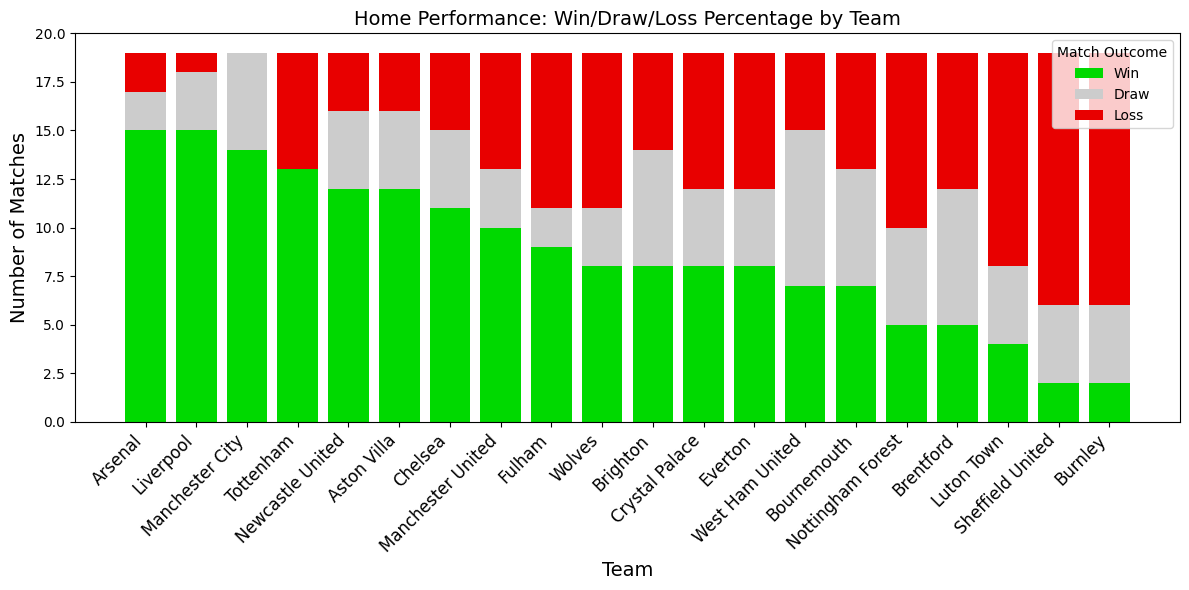

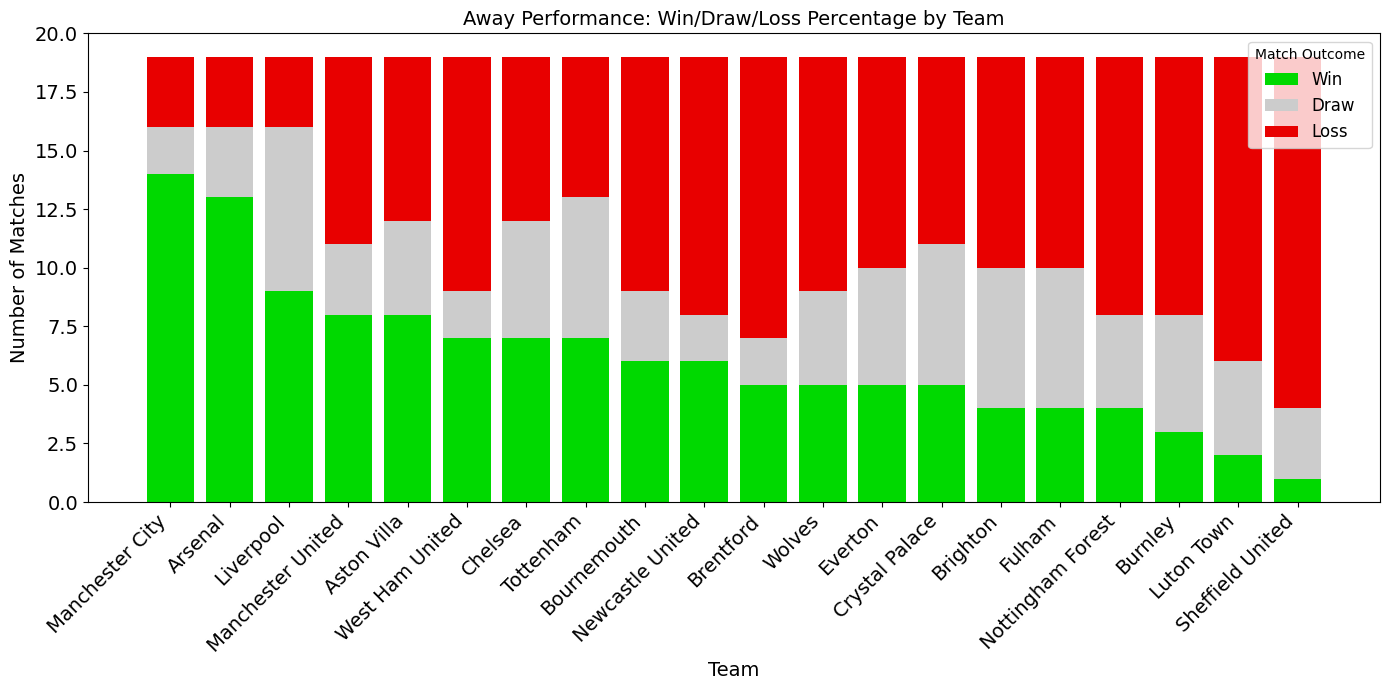

In [6]:
##1. MATCH OUTCOME ANALYSIS
##VENUE IMPACT: HOW DOES THE VENUE (HOME OR AWAY) AFFECT MATCH OUTCOMES (WIN, LOSS, DRAW) FOR THE VARIOUS TEAMS?
#Grouping the data by Team, Venue, and Match Outcome
outcome_by_team_venue = matches.groupby(['Team', 'Venue', 'Match_Outcome']).size().unstack(fill_value=0).reset_index()

#Filtering for home and away data
home_data = outcome_by_team_venue[outcome_by_team_venue['Venue'] == 'Home'].set_index('Team')
away_data = outcome_by_team_venue[outcome_by_team_venue['Venue'] == 'Away'].set_index('Team')

#Sorting teams by Wins in descending order
home_data_sorted = home_data.sort_values(by='W', ascending=False)
away_data_sorted = away_data.sort_values(by='W', ascending=False)

#Stacked bar plot for home matches
plt.figure(figsize=(12, 6))
home_teams = home_data_sorted.index
plt.bar(home_teams, home_data_sorted['W'], label='Win', color='#00D900')
plt.bar(home_teams, home_data_sorted['D'], bottom=home_data_sorted['W'], label='Draw', color='#CCCCCC')
plt.bar(home_teams, home_data_sorted['L'], bottom=home_data_sorted['W'] + home_data_sorted['D'], label='Loss', color='#E80000')
plt.title('Home Performance: Win/Draw/Loss Percentage by Team', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.legend(title='Match Outcome', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)
plt.ylim(0, 20) 
plt.tight_layout()
plt.show()

#Stacked bar plot for away matches
plt.figure(figsize=(14, 7))
away_teams = away_data_sorted.index
plt.bar(away_teams, away_data_sorted['W'], label='Win', color='#00D900')
plt.bar(away_teams, away_data_sorted['D'], bottom=away_data_sorted['W'], label='Draw', color='#CCCCCC')
plt.bar(away_teams, away_data_sorted['L'], bottom=away_data_sorted['W'] + away_data_sorted['D'], label='Loss', color='#E80000')
plt.title('Away Performance: Win/Draw/Loss Percentage by Team', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.legend(title='Match Outcome', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 20) 
plt.tight_layout()
plt.show()

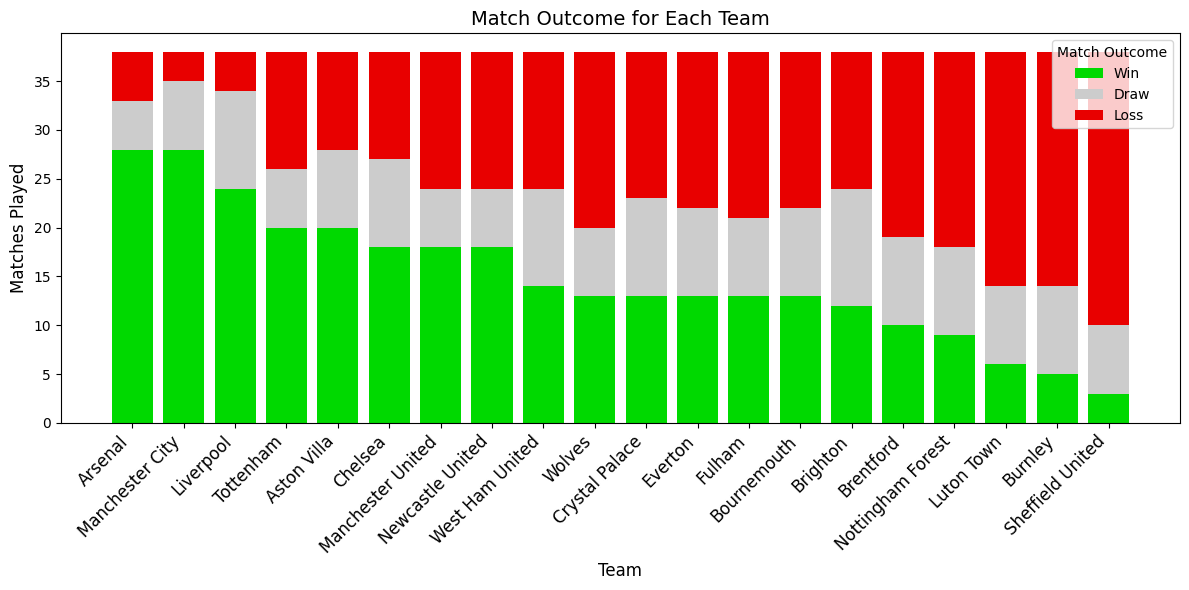

In [7]:
##WHAT IS THE OUTCOME FOR EACH TEAM? (TOTAL NUMBER OF WINS, DRAWS AND LOSSES)
#Grouping by team and match outcome, counting the number of occurrences, resetting the index
match = matches.groupby(['Team', 'Match_Outcome']).size().reset_index(name='match')

#Creating a dictionary to map 'W', 'D', 'L' to 'Win', 'Draw', 'Loss'
result_labels = {'W': 'Win', 'D': 'Draw', 'L': 'Loss'}

#Mapping the short codes to full labels in the DataFrame
match['Match_Outcome'] = match['Match_Outcome'].map(result_labels)

#Pivoting the data to get columns for 'Win', 'Draw', and 'Loss'
match_pivot = match.pivot(index='Team', columns='Match_Outcome', values='match').fillna(0)

#Extracting the sorted order of teams based on the number of wins
sorted_teams_by_wins = match_pivot.sort_values(by='Win', ascending=False).index

#Sorting the data based on wins
match_pivot = match_pivot.loc[sorted_teams_by_wins]

#Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(match_pivot.index, match_pivot['Win'], color='#00D900', label='Win')
plt.bar(match_pivot.index, match_pivot['Draw'], bottom=match_pivot['Win'], color='#CCCCCC', label='Draw')
plt.bar(match_pivot.index, match_pivot['Loss'], bottom=match_pivot['Win'] + match_pivot['Draw'], color='#E80000', label='Loss')
plt.title('Match Outcome for Each Team', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Matches Played', fontsize=12) 
plt.xticks(rotation=45, ha='right', fontsize=12)
#plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.5)
plt.legend(title='Match Outcome')
plt.tight_layout()
plt.show()

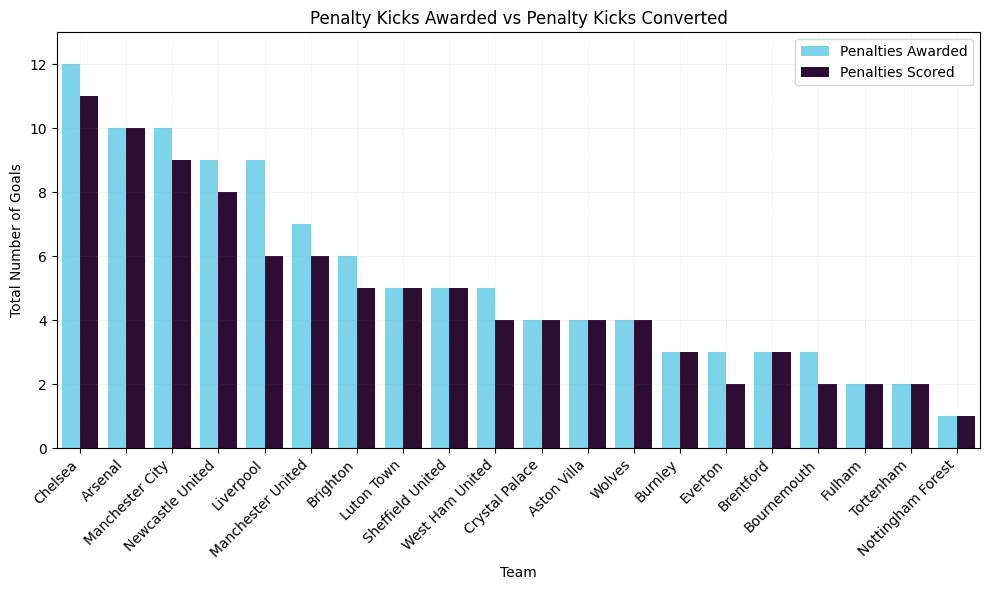

In [8]:
##2. SCORING PATTERNS 
##HOW DO PENALTY KICKS AWARDED COMPARE TO PENALTY KICKS SCORED? 
#Grouping and summing data to hold the total numeric values for each team and sorting the teams by Penalty Kicks Attempted in descending order
goals_summary = matches.groupby('Team').sum(numeric_only=True).reset_index()

#Sorting the teams by Penalty Kicks Attempted in descending order
goals_summary_sorted = goals_summary.sort_values(by='Penalty_Kicks_Attempted', ascending=False)


#Reshaping the data for plotting and summarizing the total goals from penalties and free kicks per team
goals_summary_melted = goals_summary_sorted.melt(id_vars='Team', value_vars=['Penalty_Kicks_Attempted', 'Penalty_Kicks_Scored'], 
                                                 var_name='Goal_Type', value_name='Goals')

#Custom colors for 'Penalty Kicks Awarded' and 'Penalty Kicks Scored'
custom_palette = {'Penalty_Kicks_Attempted': '#6BDEFC', 'Penalty_Kicks_Scored': '#32073A'}

#Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Goals', hue='Goal_Type', data=goals_summary_melted, palette=custom_palette)
plt.title('Penalty Kicks Awarded vs Penalty Kicks Converted')
plt.xlabel('Team')
plt.ylabel('Total Number of Goals')
plt.legend(title='Goal Type')
plt.ylim(0, 13)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.tight_layout()

#Manually setting the legend labels
#Get the legend object
legend = plt.legend()

#Changing the text for the first and second label
legend.get_texts()[0].set_text('Penalties Awarded')
legend.get_texts()[1].set_text('Penalties Scored')
plt.show()

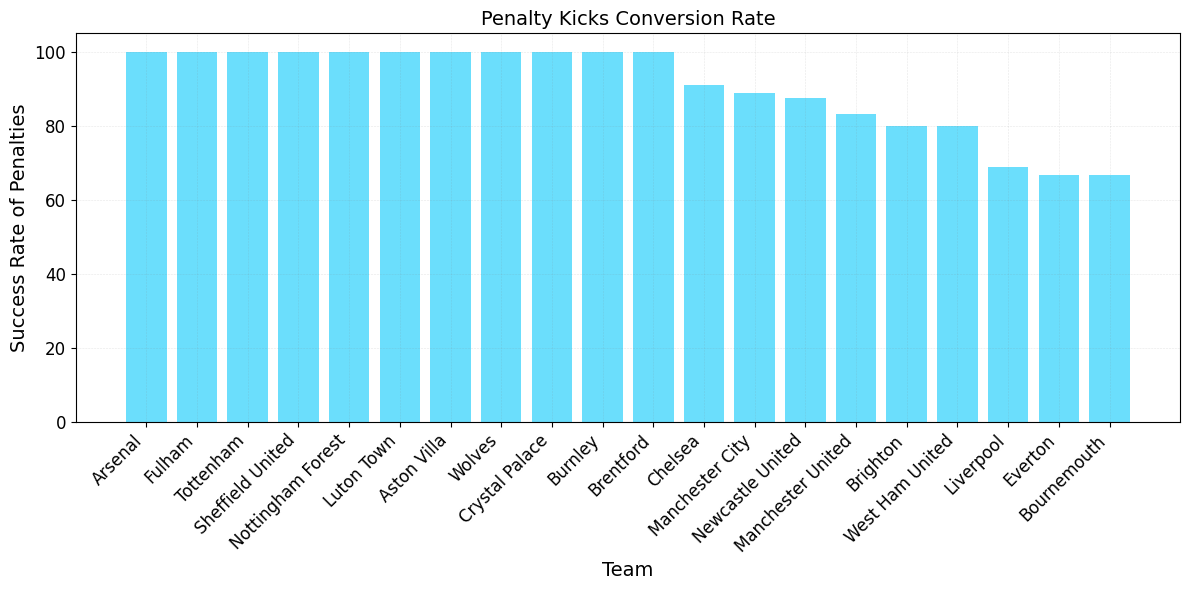

In [9]:
##WHICH TEAMS HAVE HIGH PENALTY SUCCESS RATES FOR PENALTY KICKS AWARDED?
#Calculating success rate for each team
matches['Penalty_Success_Rate'] = (matches['Penalty_Kicks_Scored'] / matches['Penalty_Kicks_Attempted'])*100

#Group by team to get the average success rate
success_rate_per_team = matches.groupby('Team')['Penalty_Success_Rate'].mean().reset_index().sort_values(by='Penalty_Success_Rate', ascending=False)

#Plotting the success rate of penalty kicks attempted by each team
plt.figure(figsize=(12, 6))
plt.bar(success_rate_per_team['Team'], success_rate_per_team['Penalty_Success_Rate'], color='#6BDEFC')
plt.title('Penalty Kicks Conversion Rate', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Success Rate of Penalties', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2) 
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

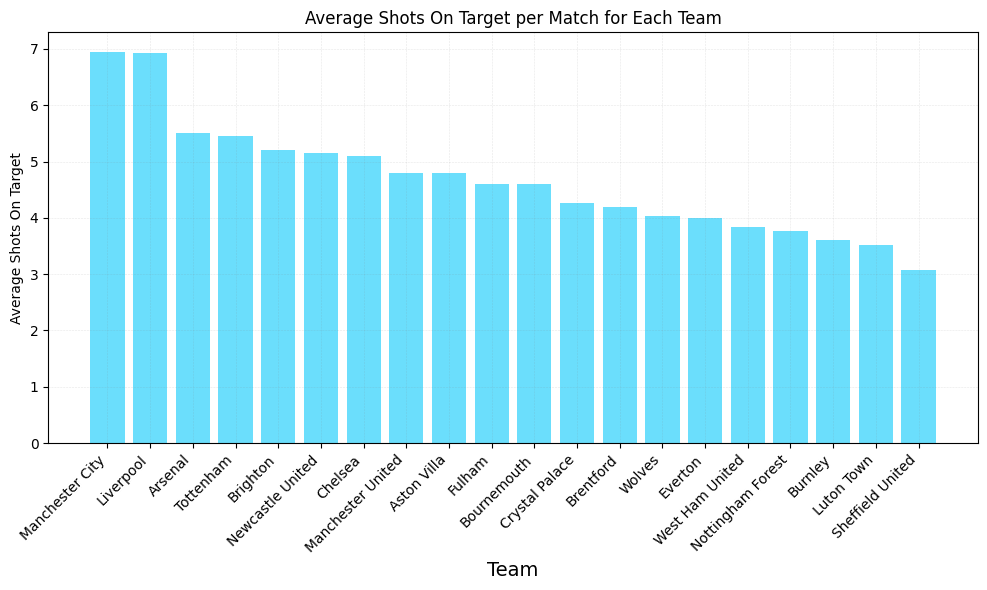

In [10]:
##3. SHOTS ANALYSIS - WHAT IS THE AVERAGE NUMBER OF SHOTS ON TARGET PER MATCH FOR EACH TEAM?
#Calculating the average number of shots on target per match for each team
average_shots_on_target = matches.groupby('Team')['Shots_On_Target'].mean().reset_index().sort_values(by='Shots_On_Target', ascending=False)

#Renaming the columns for clarity
average_shots_on_target.columns = ['Team', 'Average_Shots_On_Target']
#print(average_shots_on_target)

#Plotting the average number of shots on target per match for each team
plt.figure(figsize=(10, 6))
plt.bar(average_shots_on_target['Team'], average_shots_on_target['Average_Shots_On_Target'], color='#6BDEFC')
plt.title('Average Shots On Target per Match for Each Team')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Average Shots On Target')
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xticks(rotation=45, ha='right')
plt.yticks()
plt.tight_layout()
plt.show()

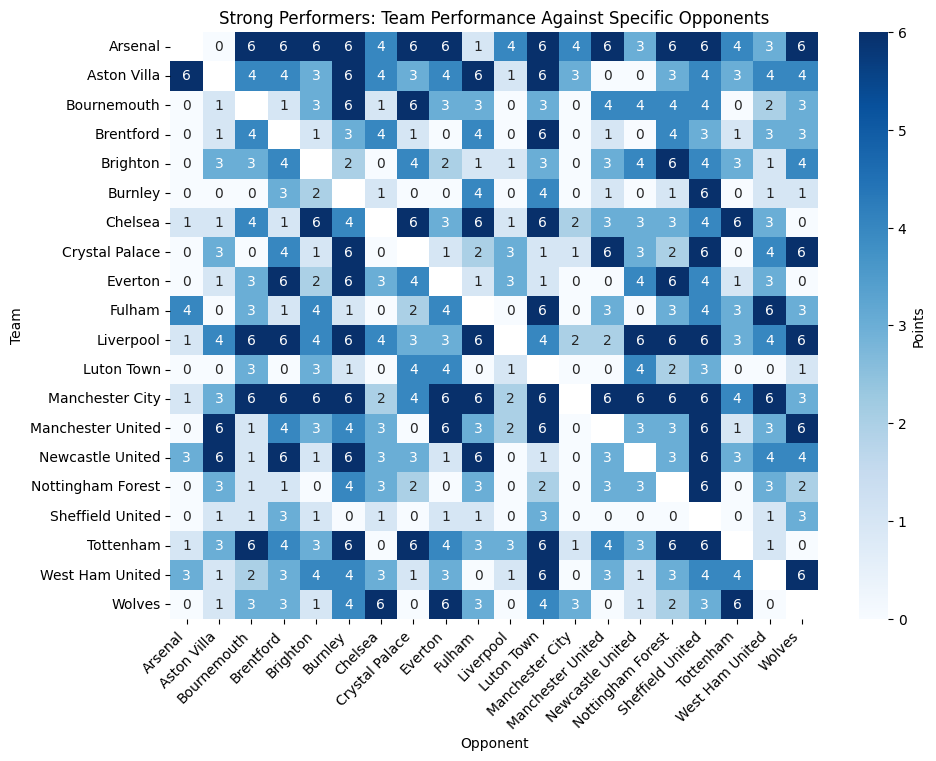

In [11]:
##4. HEAD-TO-HEAD COMPARISONS (OPPONENT ANALYSIS)
##STRONG PERFORMERS: WHICH TEAMS HAVE THE BEST RECORDS AGAINST SPECIFIC OPPONENTS?
#Mapping Match_Outcome to Points using the standard point system for English Premier League (W=3, D=1, L=0 points)
df['Points'] = matches['Match_Outcome'].map({'W': 3, 'D': 1, 'L': 0})

#Aggregating the data and grouping by team and opponent and summing points for each group telling us how many points 
#each team has earned against each component
performance_summary = df.groupby(['Team', 'Opponent'])['Points'].sum().reset_index()

#Pivoting the data to prepare for heatmap plotting
pivot_table = performance_summary.pivot_table(index='Team', columns='Opponent', values='Points')

#Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', cbar_kws={'label': 'Points'})
plt.title('Strong Performers: Team Performance Against Specific Opponents')
plt.xlabel('Opponent')
plt.ylabel('Team')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

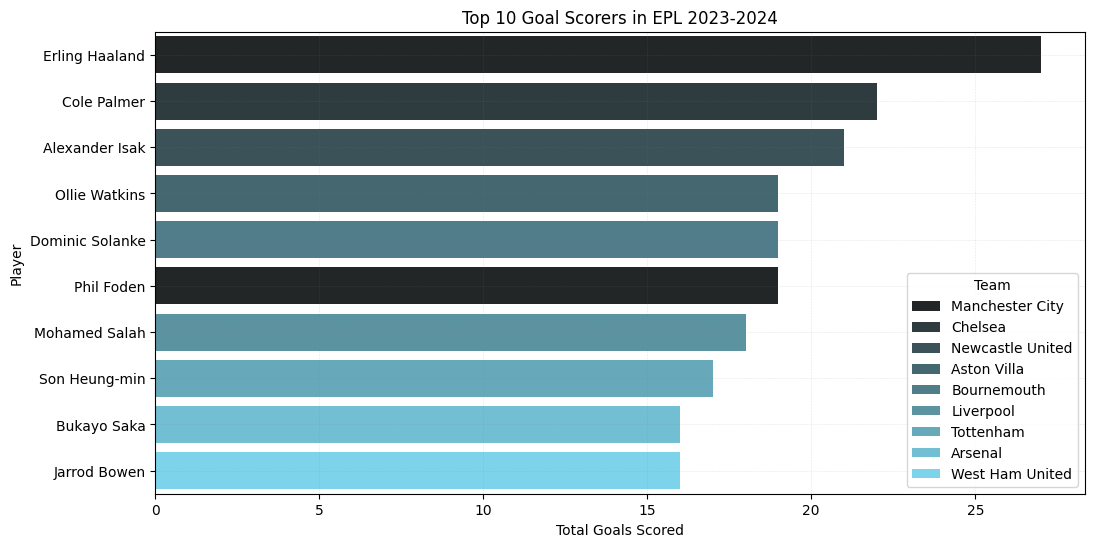

In [12]:
##5. TOP PERFORMERS
##WHO ARE THE TOP GOAL SCORERS IN THE LEAGUE?
#Sorting by 'Total_Goals_Scored' in descending order and selecting top 10 scorers
top_scorers = players[['Player', 'Team', 'goals_scored']].sort_values(by='goals_scored', ascending=False).head(10)

# Plotting the top goal scorers
plt.figure(figsize=(12, 6))
sns.barplot(x='goals_scored', y='Player', hue='Team', data=top_scorers, palette='dark:#6BDEFC')
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xlabel('Total Goals Scored')
plt.ylabel('Player')
plt.title('Top 10 Goal Scorers in EPL 2023-2024')
plt.legend(title='Team', loc='lower right')
plt.show()

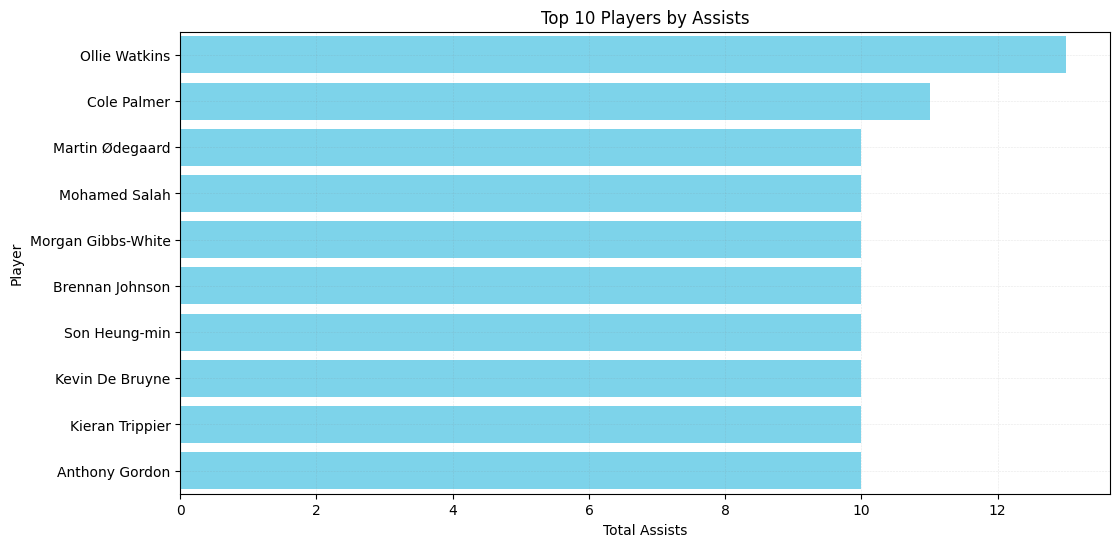

In [13]:
##WHICH PLAYERS HAVE THE HIGHEST ASSISTS?
top_assists = players[['Player', 'assists']].sort_values(by='assists', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='assists', y='Player', data=top_assists, color='#6BDEFC', legend=False)
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xlabel('Total Assists')
plt.ylabel('Player')
plt.title('Top 10 Players by Assists')
plt.show()

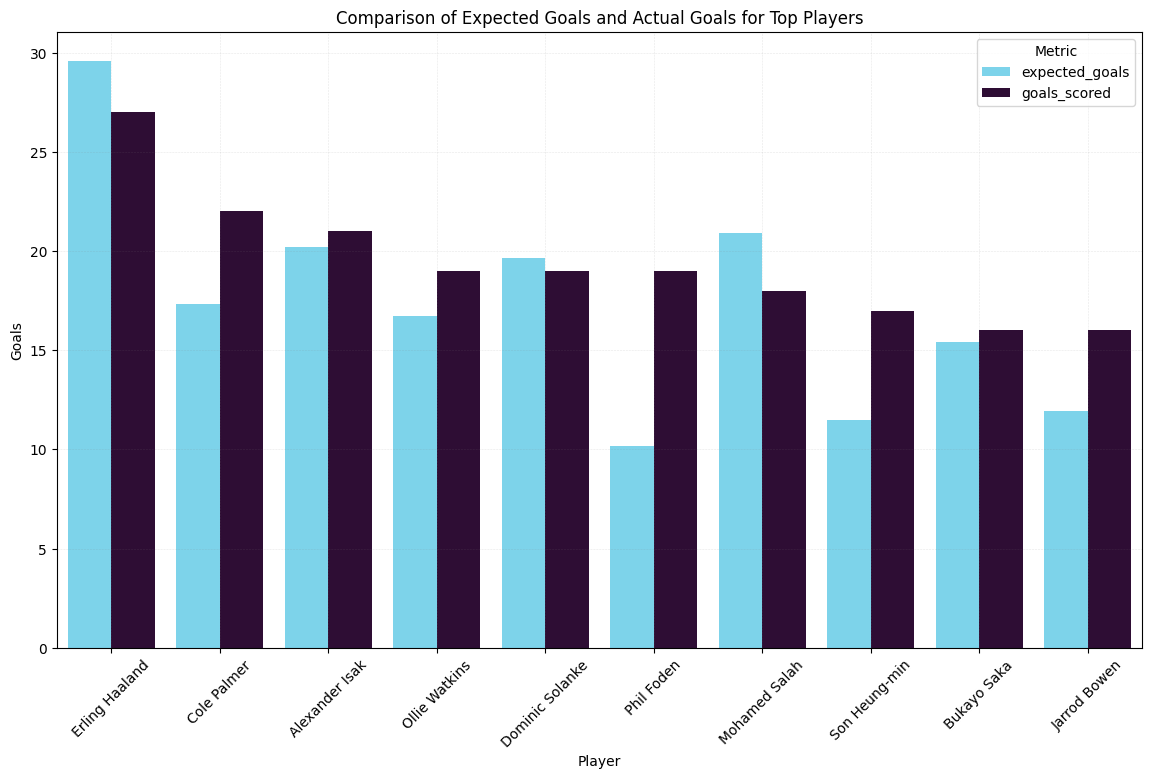

In [14]:
#WHICH PLAYERS HAVE THE HIGHEST EXPECTED GOALS AND HOW DO THEY COMPARE TO THEIR ACTUAL GOALS?
#Sorting players by expected goals and select the top players
top_expected_goals = players.sort_values(by='goals_scored', ascending=False).head(10)

#Melting the DataFrame for easier plotting with seaborn
top_expected_goals_melted = pd.melt(top_expected_goals, id_vars=['Player', 'Team'], 
                                    value_vars=['expected_goals', 'goals_scored'], 
                                    var_name='Metric', value_name='Goals')
plt.figure(figsize=(14, 8))
custom_palette = {'expected_goals': '#6BDEFC', 'goals_scored': '#32073A'}
sns.barplot(x='Player', y='Goals', hue='Metric', data=top_expected_goals_melted, palette=custom_palette)
plt.title("Comparison of Expected Goals and Actual Goals for Top Players")
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xlabel("Player")
plt.ylabel("Goals")
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

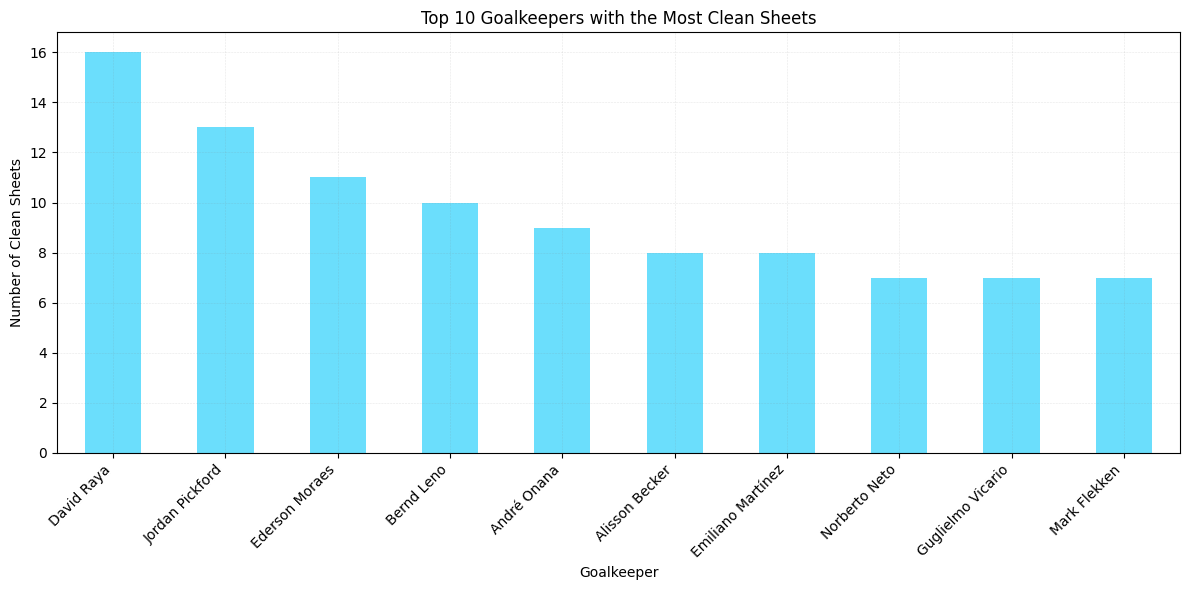

In [15]:
##6. DEFENSIVE PERFORMANCE 
##WHICH GOALKEEPERS HAVE THE MOST CLEAN SHEETS?
#Filtering the dataset to include only goalkeepers
goalkeepers_df = players[players['Position'] == 'GK']
clean_sheets_data = goalkeepers_df.groupby('Player')['clean_sheets'].sum().sort_values(ascending=False).head(10)

#Plotting the top 10 players with the most clean sheets
clean_sheets_data.plot(kind='bar', figsize=(12, 6), color='#6BDEFC')
plt.xlabel('Goalkeeper')
plt.ylabel('Number of Clean Sheets')
plt.title('Top 10 Goalkeepers with the Most Clean Sheets')
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

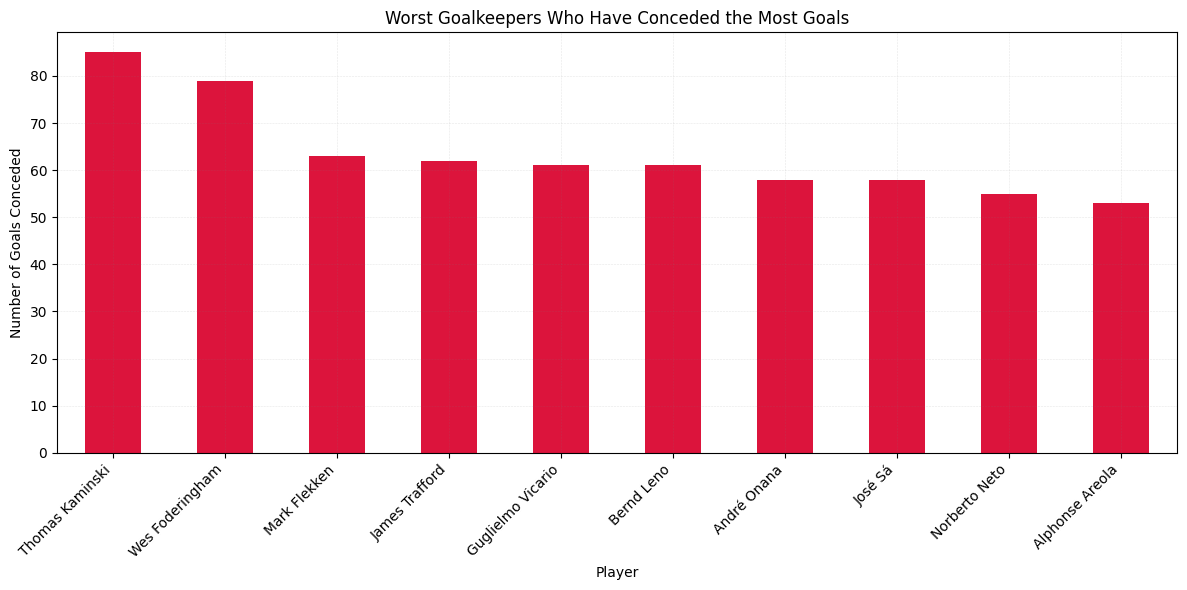

In [16]:
##WHICH GOALKEEPERS HAVE CONCEDED THE MOST GOALS?
#Filtering the dataset to include only goalkeepers
goalkeepers_df = players[players['Position'] == 'GK']
goals_conceded = goalkeepers_df.groupby('Player')['goals_conceded'].sum().sort_values(ascending=False).head(10)

#Plotting the top 10 goalkeepers who have conceded the most goals
goals_conceded.plot(kind='bar', figsize=(12, 6), color='crimson')
plt.xlabel('Player')
plt.ylabel('Number of Goals Conceded')
plt.title('Worst Goalkeepers Who Have Conceded the Most Goals')
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

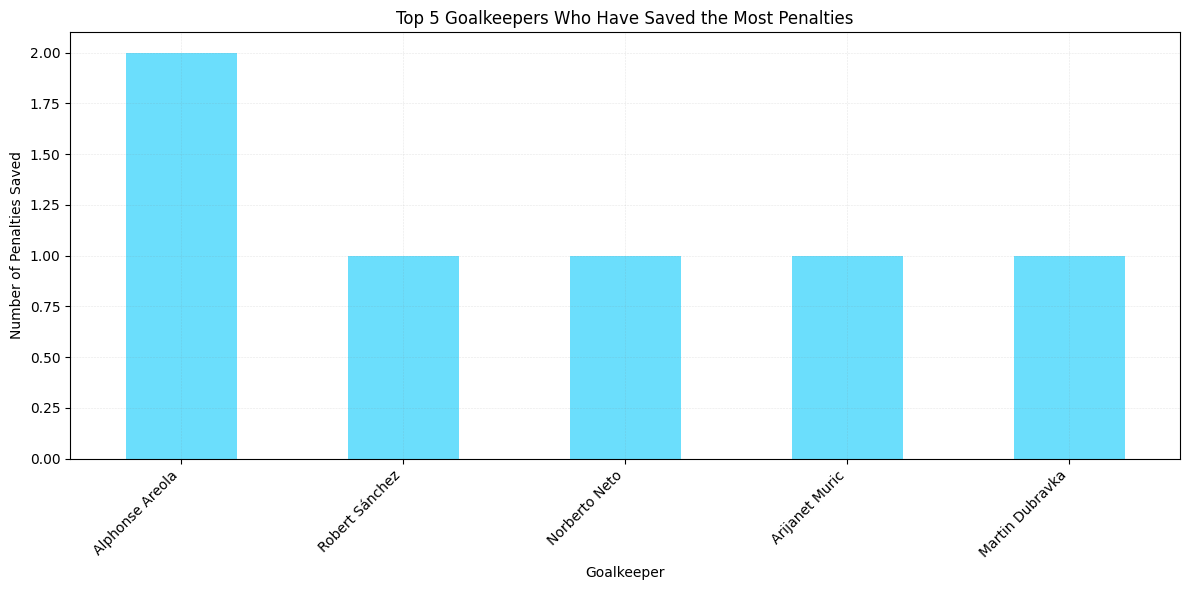

In [17]:
##7. PENALTIES 
##WHICH GOALKEEPERS HAVE SAVED THE MOST PENALTIES?
#Filtering the dataset to include only goalkeepers
goalkeepers_df = players[players['Position'] == 'GK']
penalties_saved_data = goalkeepers_df.groupby('Player')['penalties_saved'].sum().sort_values(ascending=False).head(5)

#Plotting the top 10 goalkeepers who have saved the most penalties
penalties_saved_data.plot(kind='bar', figsize=(12, 6), color='#6BDEFC')
plt.xlabel('Goalkeeper')
plt.ylabel('Number of Penalties Saved')
plt.title('Top 5 Goalkeepers Who Have Saved the Most Penalties')
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

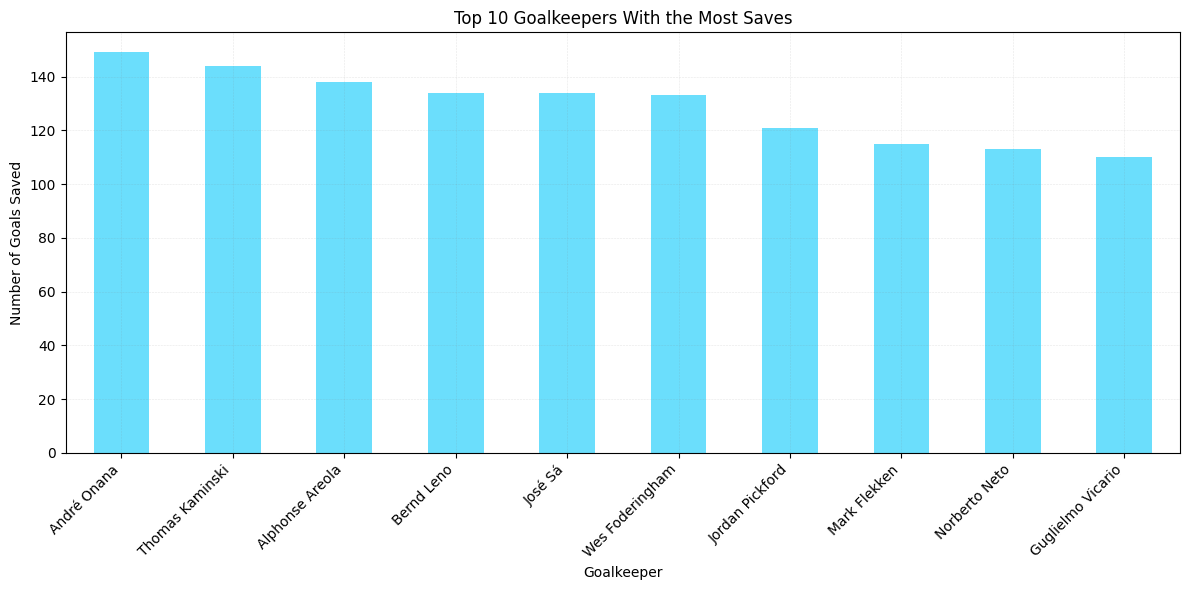

In [18]:
##WHICH GOALKEEPERS HAVE THE MOST SAVES?
saves_per_match = goalkeepers_df.groupby('Player')['saves'].sum().sort_values(ascending=False).head(10) 

#Plotting the top 10 goalkeepers who have saved the most penalties
saves_per_match.plot(kind='bar', figsize=(12, 6), color='#6BDEFC')
plt.xlabel('Goalkeeper')
plt.ylabel('Number of Goals Saved')
plt.title('Top 10 Goalkeepers With the Most Saves')
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

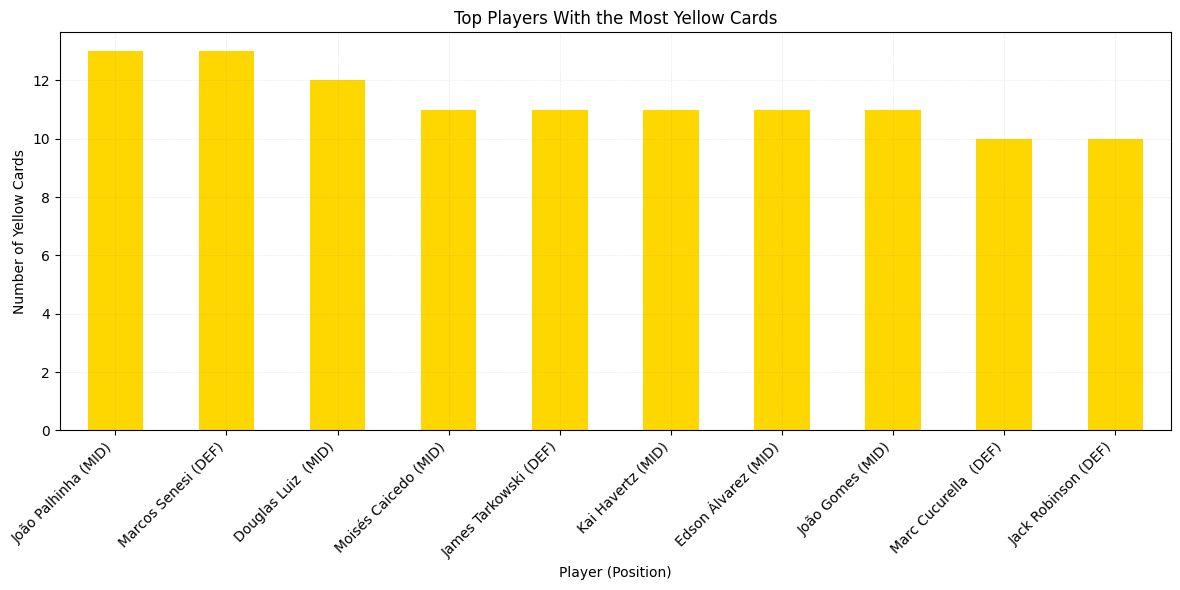

In [19]:
##8. DISCIPLINARY RECORDS
##WHICH PLAYERS HAVE RECEIVED THE MOST YELLOW CARDS? 
#Combining Player and Position for Yellow Cards
yellow_cards_data = players.groupby(['Player', 'Position'])['yellow_cards'].sum().sort_values(ascending=False).head(10)
yellow_cards_data.index = yellow_cards_data.index.map(lambda x: f"{x[0]} ({x[1]})")

#Plotting Yellow Cards
yellow_cards_data.plot(kind='bar', figsize=(12, 6), color='gold')
plt.xlabel('Player (Position)')
plt.ylabel('Number of Yellow Cards')
plt.title('Top Players With the Most Yellow Cards')
plt.grid(True, linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

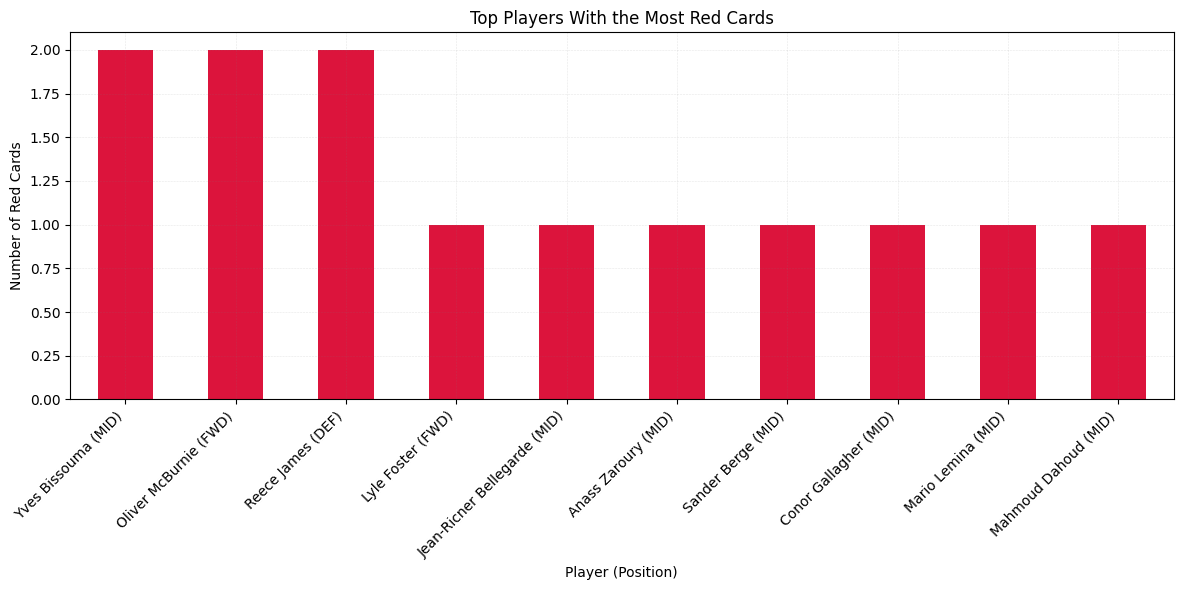

In [20]:
##WHICH PLAYERS HAVE RECEIVED THE MOST RED CARDS?
#Combining Player and Position for Red Cards
red_cards_data = players.groupby(['Player', 'Position'])['red_cards'].sum().sort_values(ascending=False).head(10)
red_cards_data.index = red_cards_data.index.map(lambda x: f"{x[0]} ({x[1]})")

#Plotting Red Cards
red_cards_data.plot(kind='bar', figsize=(12, 6), color='crimson')
plt.xlabel('Player (Position)')
plt.ylabel('Number of Red Cards')
plt.title('Top Players With the Most Red Cards')
plt.grid(True, linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

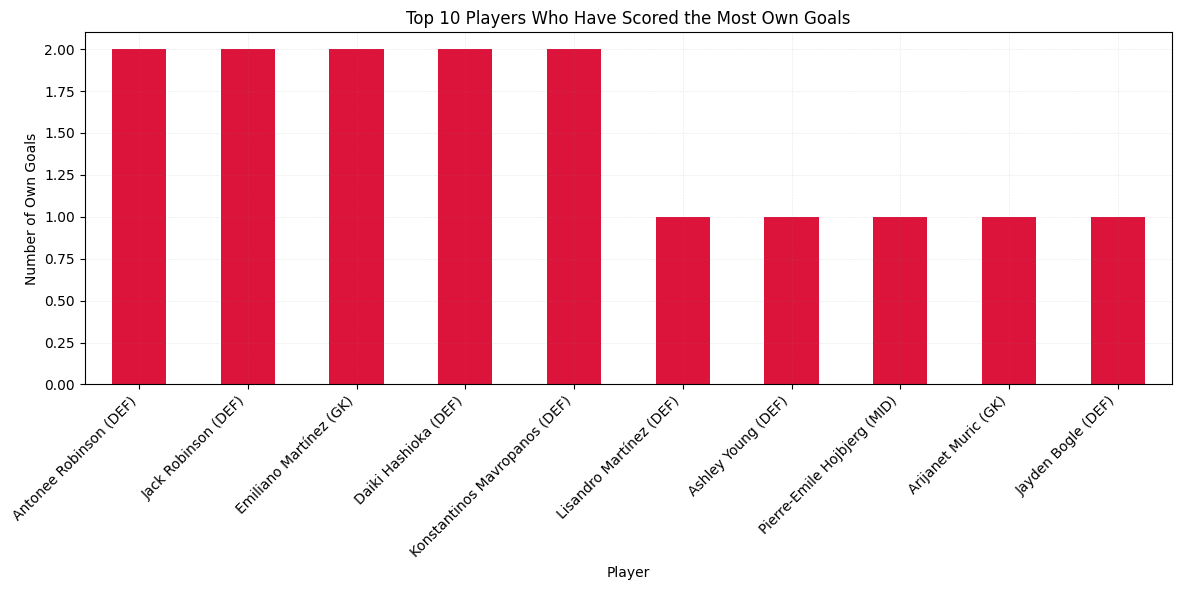

In [21]:
##9. OWN GOALS
#WHICH PLAYERS HAVE SCORED THE MOST OWN GOALS?
own_goals_data = players.groupby(['Player', 'Position'])['own_goals'].sum().sort_values(ascending=False).head(10)
own_goals_data.index = own_goals_data.index.map(lambda x: f"{x[0]} ({x[1]})")

#Plotting the top 10 players who have scored the most own goals
own_goals_data.plot(kind='bar', figsize=(12, 6), color='crimson')
plt.xlabel('Player')
plt.ylabel('Number of Own Goals')
plt.title('Top 10 Players Who Have Scored the Most Own Goals')
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

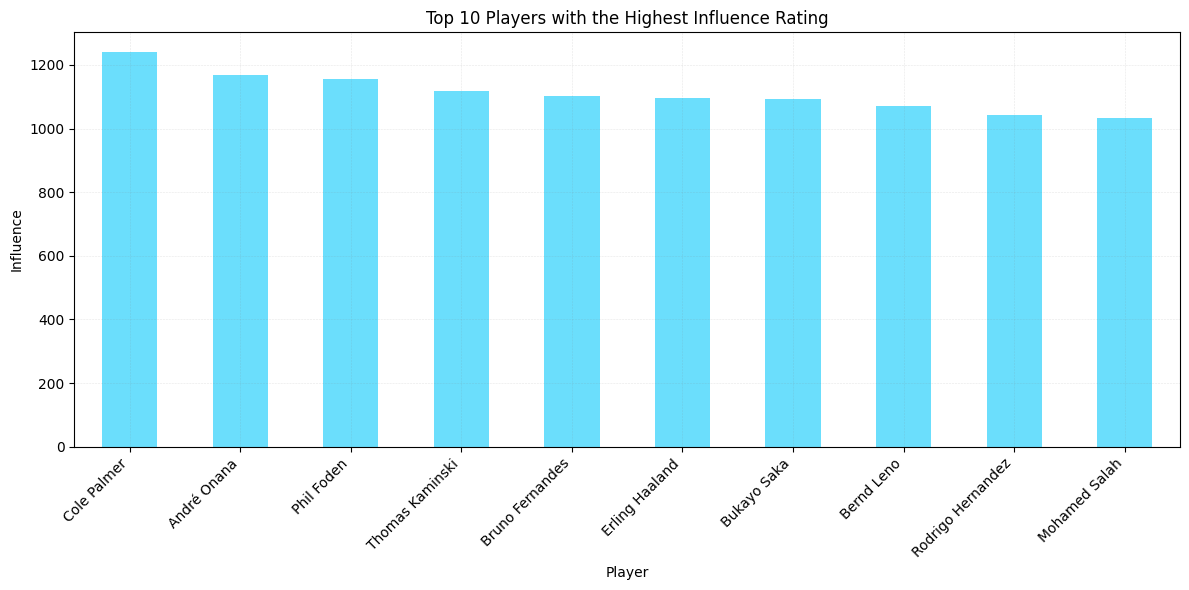

In [22]:
##10. PLAYER INFLUENCE
## WHICH PLAYERS HAVE THE HIGHEST INFLUENCE RATING?
influence_rating_data = players.groupby('Player')['influence'].sum().sort_values(ascending=False).head(10)

#Plotting the top 10 players who have the highest influence rating
influence_rating_data.plot(kind='bar', figsize=(12, 6), color='#6BDEFC')
plt.xlabel('Player')
plt.ylabel('Influence')
plt.title('Top 10 Players with the Highest Influence Rating')
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

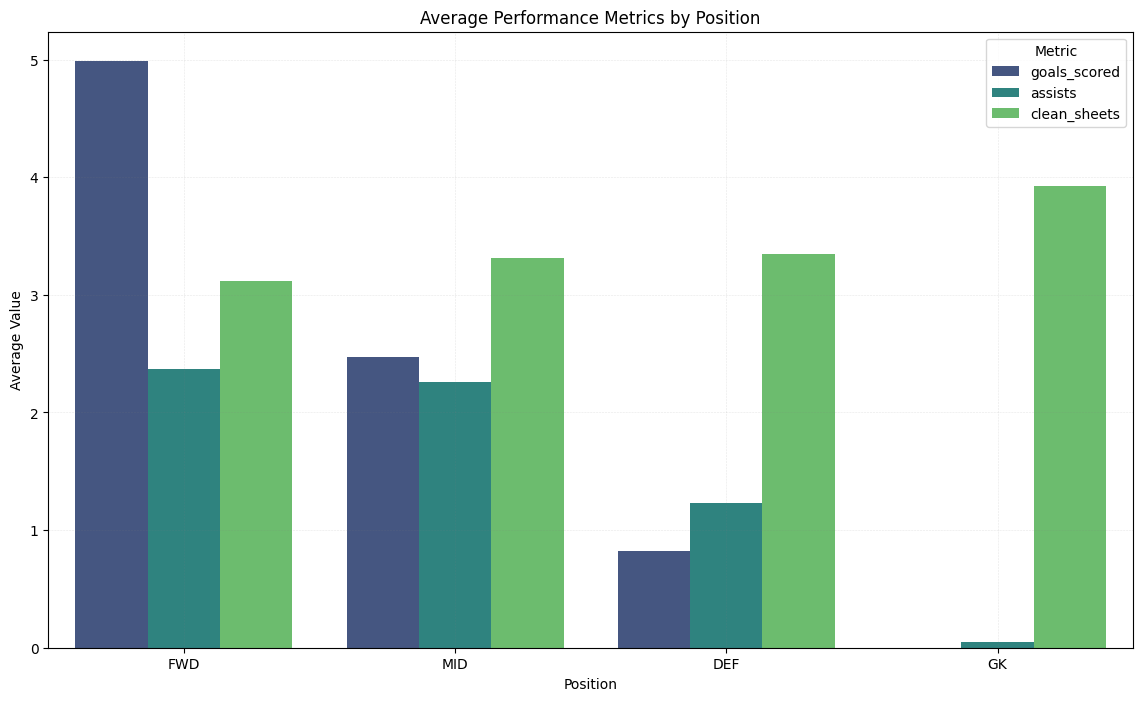

In [23]:
## 11. POSITION ANALYSIS 
## HOW DO PLAYERS' PERFORMANCE METRICS VARY BY POSITION (eg. GOALS SCORED BY FORWARDS VS. DEFENDERS)?
#Grouping by position and calculate average performance metrics
position_analysis = players.groupby('Position').agg({'goals_scored': 'mean', 'assists': 'mean','clean_sheets': 'mean'}).reset_index()

#Sorting players by goals scored 
position_analysis = position_analysis.sort_values(by='goals_scored', ascending=False).head(10)

#Melting the DataFrame for easier plotting with seaborn
position_melted = pd.melt(position_analysis, id_vars='Position', var_name='Metric', value_name='Average')

#Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='Position', y='Average', hue='Metric', data=position_melted, palette='viridis')
plt.title("Average Performance Metrics by Position")
plt.grid(True, which='both', linestyle='--', linewidth=0.4, color='gray', alpha=0.2)
plt.xlabel("Position")
plt.ylabel("Average Value")
plt.legend(title='Metric')
plt.show()